## Problem 2

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()

from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(solver='lbfgs')

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
x = np.array([i for i in range(10,30)])
y = np.concatenate([np.ones(10), np.zeros(10)])

Let's imagine to make a perfectly balanced dataset (as all things should be), with a list of customers and a label that indicates whether or not the customer has made a purchase. 
 There are 20 clients in the dataset. Consumers aged 10 to 19 years old who purchased and customers aged 20 to 29 years old who did not purchase. 
 Number of Purchased Item is a binary label consisting of the numbers 0 and 1, with 0 indicating client did not make a purchase and 1 indicating customer made a buy. 



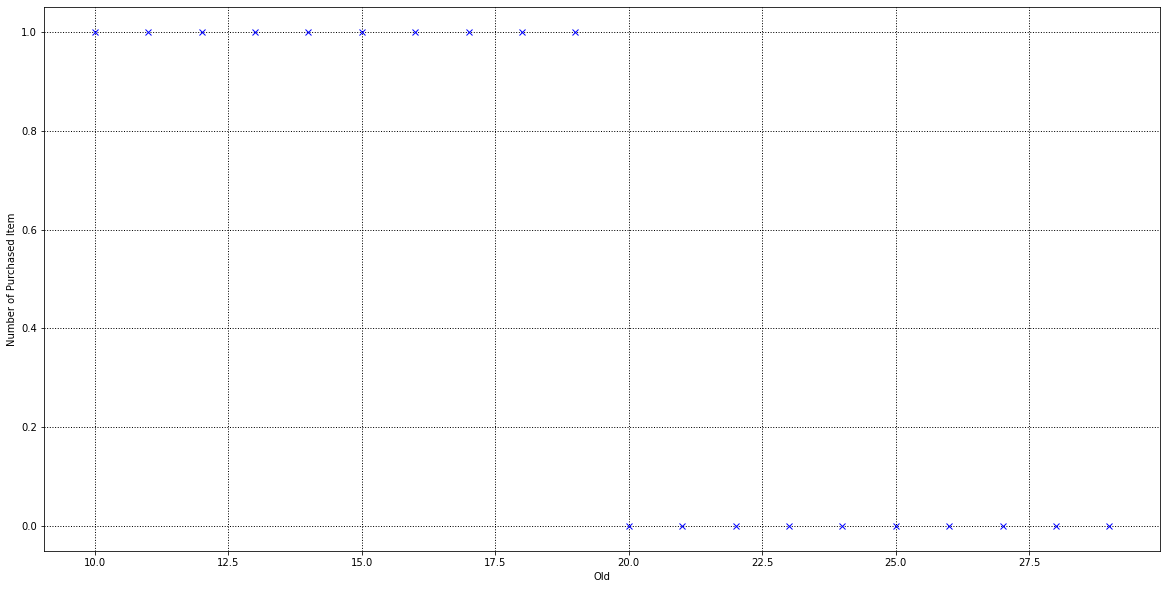

In [3]:
fig = plt.figure(figsize=(20,10))
xlabel = 'Old'
ylabel = 'Number of Purchased Item'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
_ = plt.plot(x, y, 'xb')

print("Let's imagine to make a perfectly balanced dataset (as all things should be), with a list of customers and a label that indicates whether or not the customer has made a purchase. \n There are 20 clients in the dataset. Consumers aged 10 to 19 years old who purchased and customers aged 20 to 29 years old who did not purchase. \n Number of Purchased Item is a binary label consisting of the numbers 0 and 1, with 0 indicating client did not make a purchase and 1 indicating customer made a buy. \n")

#### Model Training for Linear Regression

A linear regression model's goal is to discover a correlation between the input variables and the target variable. 
 The above dataset was used to train our linear regression model. 
 The red line is the best fit line for the training dataset, with the goal of minimizing the difference between the predicted and actual value. 



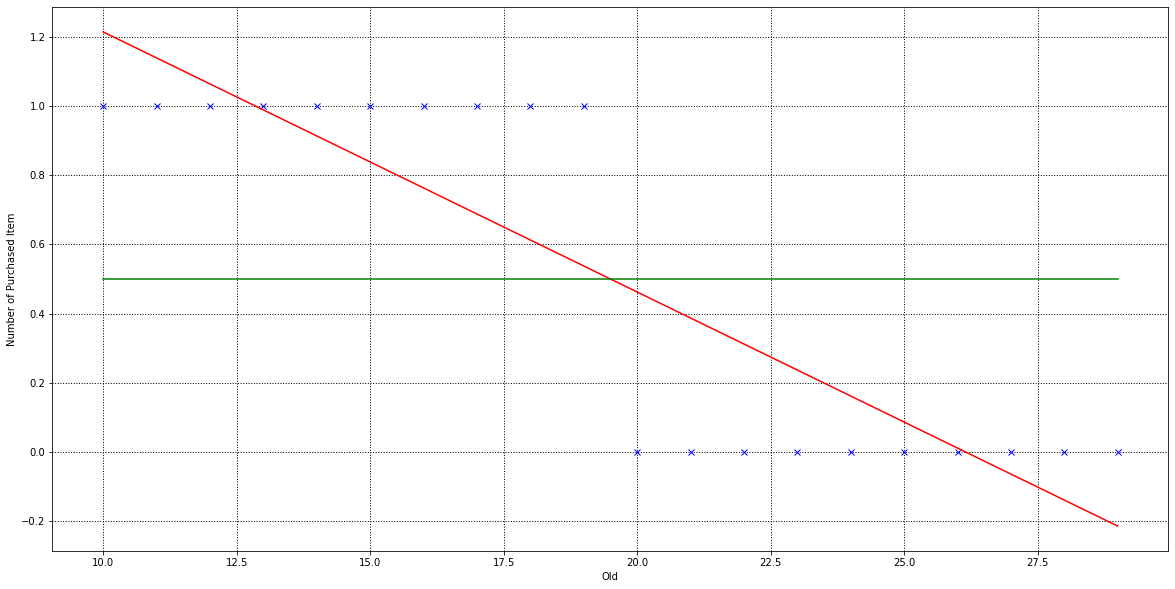

In [4]:
_ = lin_regression.fit(pd.DataFrame(x), y)

lin_y_pred_1 = lin_regression.predict(pd.DataFrame(x))

line_point_5 = x * 0 + .5

fig = plt.figure(figsize=(20,10))
xlabel = 'Old'
ylabel = 'Number of Purchased Item'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.plot(x, y, 'xb')
plt.plot(x, lin_y_pred_1, '-r')
_ = plt.plot(x, line_point_5,'-g')

print("A linear regression model's goal is to discover a correlation between the input variables and the target variable. \n The above dataset was used to train our linear regression model. \n The red line is the best fit line for the training dataset, with the goal of minimizing the difference between the predicted and actual value. \n")

In [5]:
test_x = np.array([i for i in range(10,35,5)])
test_y_pred = lin_regression.predict(pd.DataFrame(test_x))
test_y_pred

array([ 1.21428571,  0.83834586,  0.46240602,  0.08646617, -0.28947368])

#### Model Training for Logistic Regression

Anyone over the age of 30 has a negative bought value estimate using our linear regression model, which makes no sense. 
 However, we may make any value larger than 1 equal to 1 and any value less than 0 equal to 0. 



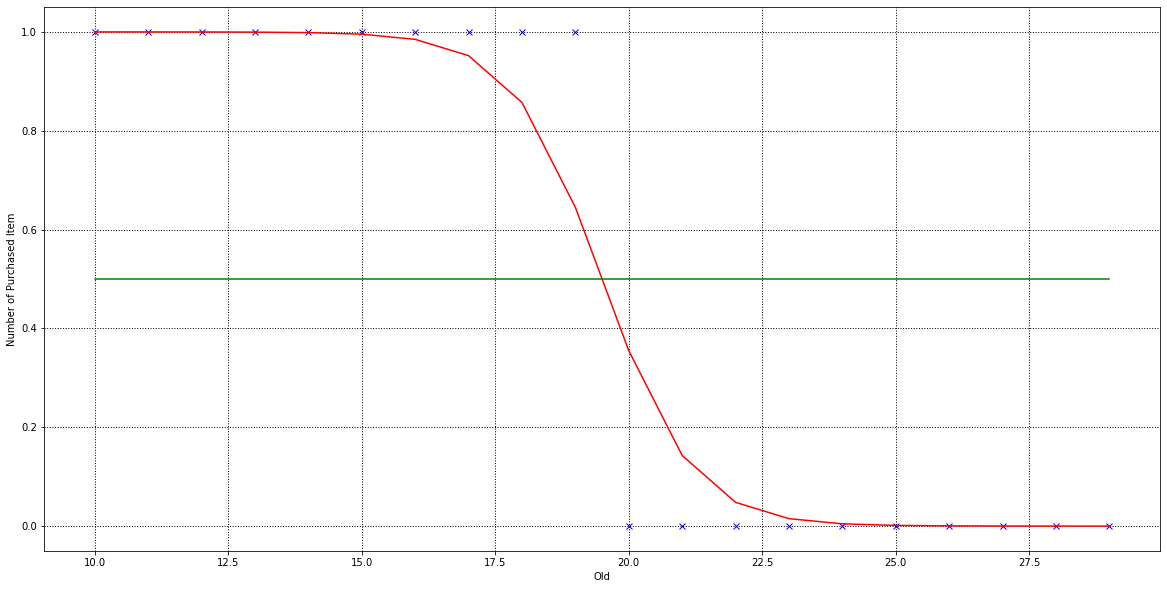

In [6]:
_ = log_regression.fit(pd.DataFrame(x), y)

y_pred = log_regression.predict_proba(pd.DataFrame(x))
log_y_pred_1 = [item[1] for item in y_pred]

fig = plt.figure(figsize=(20,10))
xlabel = 'Old'
ylabel = 'Number of Purchased Item'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.plot(x, y, 'xb')
plt.plot(x, log_y_pred_1, '-r')
_ = plt.plot(x, line_point_5,'-g')

print("Anyone over the age of 30 has a negative bought value estimate using our linear regression model, which makes no sense. \n However, we may make any value larger than 1 equal to 1 and any value less than 0 equal to 0. \n")

#### Comparing the performance of Linear Regression and Logistic Regression

In [7]:
print("The R2 value indicates how well the observed data points match the fitted regression line; the greater the value, the better. \n However, R2 alone is insufficient, therefore we also include RMSE. \n The smaller the RMSE, the closer the observed data points are to the model's anticipated values. \n")

print("Linear regression R2: ", r2_score(y, lin_y_pred_1))
print("Logistic regression R2: ", r2_score(y, log_y_pred_1))

print("\n")

print("Linear regression RMSE: ", mean_squared_error(y, lin_y_pred_1))
print("Logistic regression RMSE: ", mean_squared_error(y, log_y_pred_1))

The R2 value indicates how well the observed data points match the fitted regression line; the greater the value, the better. 
 However, R2 alone is insufficient, therefore we also include RMSE. 
 The smaller the RMSE, the closer the observed data points are to the model's anticipated values. 

Linear regression R2:  0.7518796992481203
Logistic regression R2:  0.9404089597242656


Linear regression RMSE:  0.062030075187969935
Logistic regression RMSE:  0.014897760068933596


Let's add 10 more clients between the ages of 60 and 70 to our linear regression model and see which line is the greatest fit. 

In [8]:
x = np.append(x, np.array([i for i in range(60,70)]))
y = np.append(y, np.zeros(10))

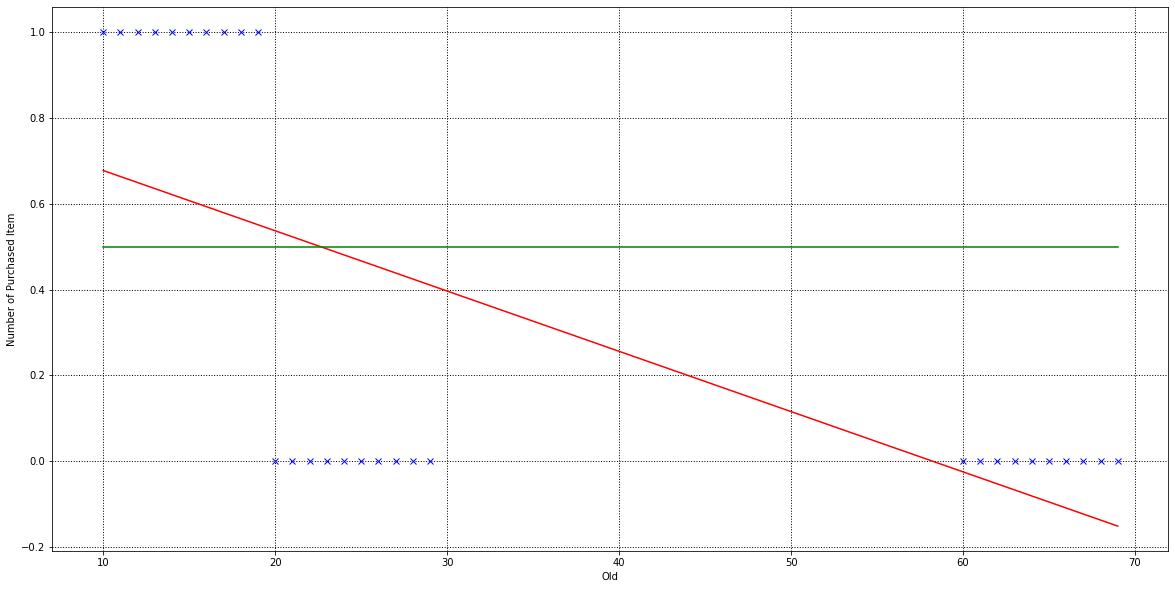

In [9]:
_ = lin_regression.fit(pd.DataFrame(x), y)

lin_y_pred_2 = lin_regression.predict(pd.DataFrame(x))

line_point_5 = x * 0 + .5

fig = plt.figure(figsize=(20,10))
xlabel = 'Old'
ylabel = 'Number of Purchased Item'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.plot(x, y, 'xb')
plt.plot(x, lin_y_pred_2, '-r')
_ = plt.plot(x, line_point_5,'-g')


In [10]:
test_x = np.array([i for i in range(18,26)])
test_y_pred = lin_regression.predict(pd.DataFrame(test_x))
test_y_pred

array([0.56495292, 0.55091537, 0.53687781, 0.52284026, 0.50880271,
       0.49476516, 0.48072761, 0.46669006])

For consumers aged 60 to 70, linear regression aims to fit the regression line by minimizing prediction error in order to minimize the disparity between expected and actual value. 
 Let's use the same dataset to train a logistic regression model. 



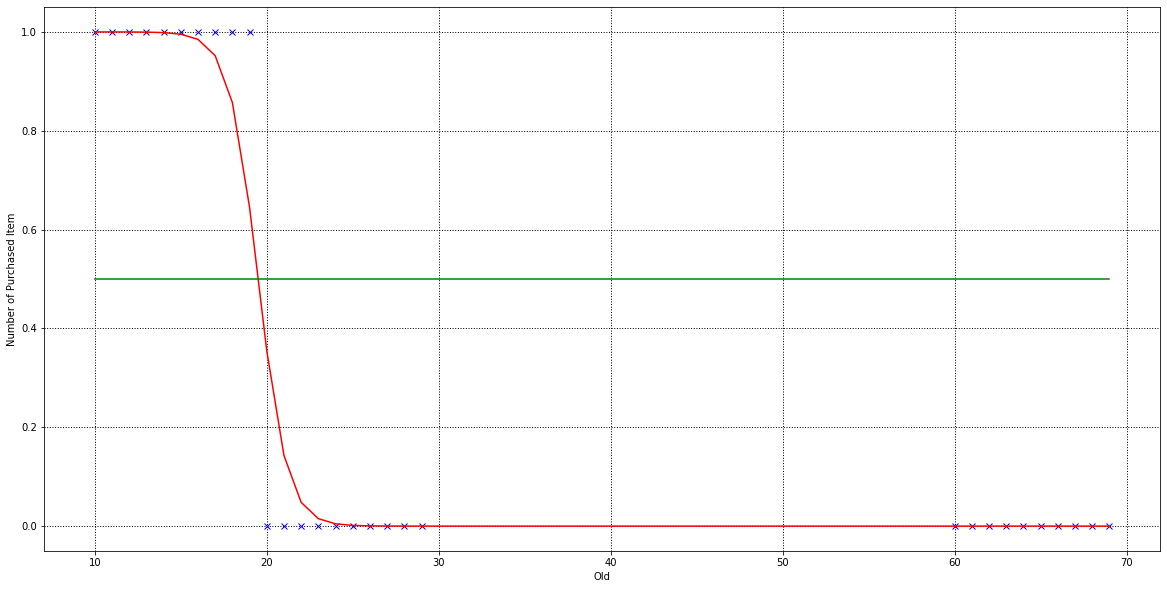

In [11]:
_ = log_regression.fit(pd.DataFrame(x), y)

y_pred = log_regression.predict_proba(pd.DataFrame(x))
log_y_pred_2 = [item[1] for item in y_pred]

fig = plt.figure(figsize=(20,10))
xlabel = 'Old'
ylabel = 'Number of Purchased Item'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.plot(x, y, 'xb')
plt.plot(x, log_y_pred_2, '-r')
_ = plt.plot(x, line_point_5,'-g')

print("For consumers aged 60 to 70, linear regression aims to fit the regression line by minimizing prediction error in order to minimize the disparity between expected and actual value. \n Let's use the same dataset to train a logistic regression model. \n")

The Linear Regression line is a straight line and the Logistic Regression line is a sigmoid curve here.


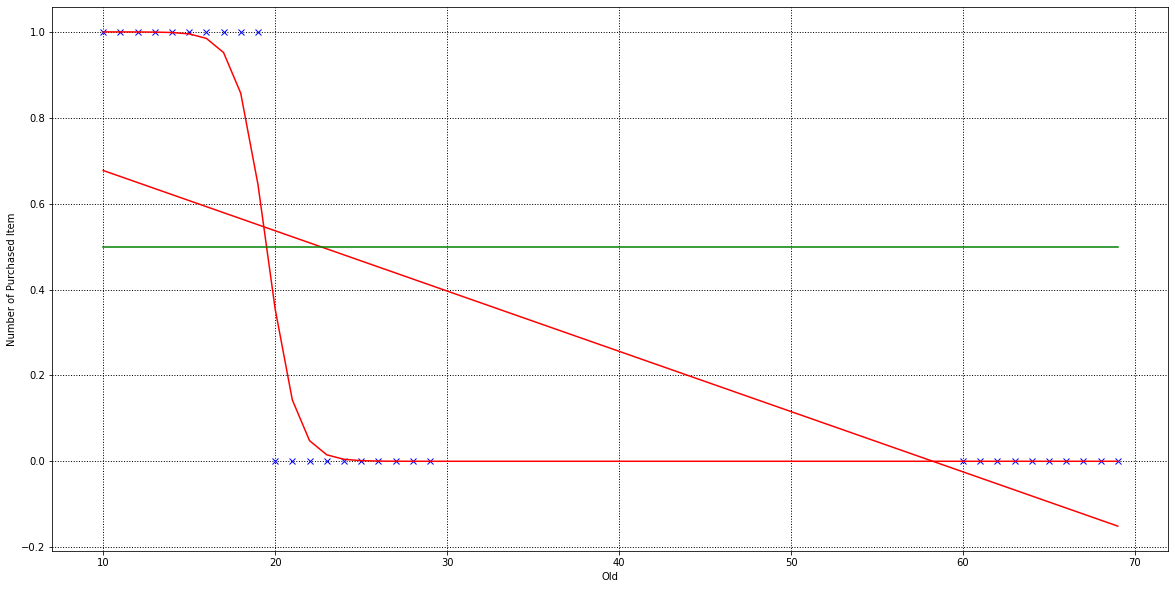

In [12]:
fig = plt.figure(figsize=(20,10))
xlabel = 'Old'
ylabel = 'Number of Purchased Item'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.plot(x, y, 'xb')
plt.plot(x, lin_y_pred_2, '-r')
plt.plot(x, log_y_pred_2, '-r')
_ = plt.plot(x, line_point_5,'-g')

print("The Linear Regression line is a straight line and the Logistic Regression line is a sigmoid curve here.")

In [13]:
test_y_pred = log_regression.predict_proba(pd.DataFrame(test_x))
test_y_pred

array([[0.14286332, 0.85713668],
       [0.35497559, 0.64502441],
       [0.64502249, 0.35497751],
       [0.85713565, 0.14286435],
       [0.95194543, 0.04805457],
       [0.98494151, 0.01505849],
       [0.99539093, 0.00460907],
       [0.99859958, 0.00140042]])

In [14]:
print("Linear regression R2: ", r2_score(y, lin_y_pred_2))
print("Logistic regression R2: ", r2_score(y, log_y_pred_2))
print("Linear regression RMSE: ", mean_squared_error(y, lin_y_pred_2))
print("Logistic regression RMSE: ", mean_squared_error(y, log_y_pred_2))

Linear regression R2:  0.42112651342340734
Logistic regression R2:  0.9553066567250715
Linear regression RMSE:  0.12863855257257611
Logistic regression RMSE:  0.009931854061095221
